## Seaborn
- Seaborn은 Matplotlib 을 기반으로 하는 Python visualization library로써 고급인터페이스를 제공하기 위한 패키지입니다.

In [1]:
%matplotlib inline
#matplotlib을 jupyter notebook안에서 plot을 볼 수 있게 하는 magic command 
%config InlineBackend.figure_formats={'png','retina'}
#png 압축 파일을 retina version으로 더욱 선명하게 볼 수 있게 하는 magic command

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

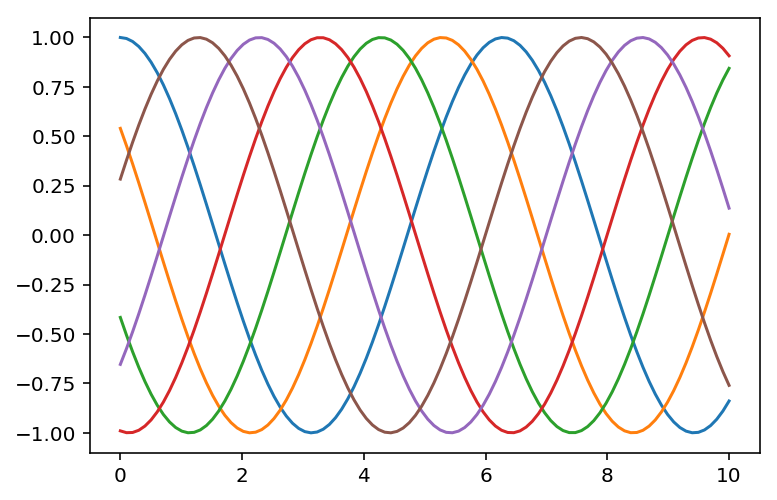

In [5]:
def cosplot():
    x=np.linspace(0,10,100)#0-10 100등분
    for i in range(6):
        plt.plot(x,np.cos(i+x))
cosplot()
#해당 plot은 pyplot 서브패키지에서 기반한 것이다.

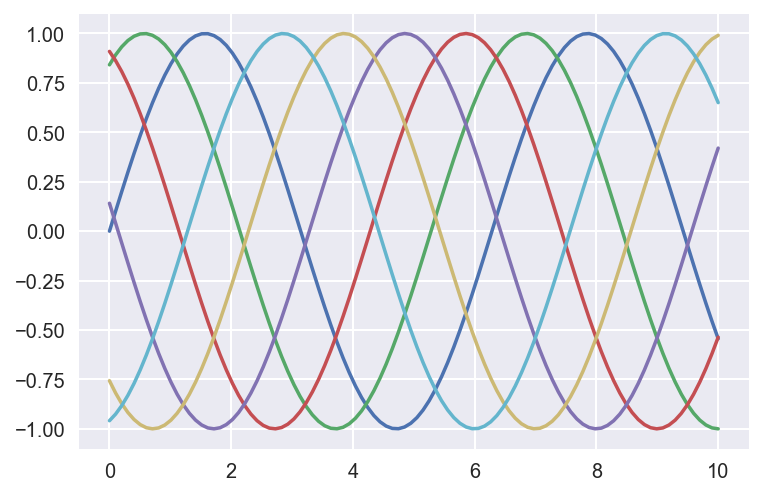

In [6]:
#seaborn version
sns.set()#seaborn setting
sinplot()

#### set style
- sns.set_style

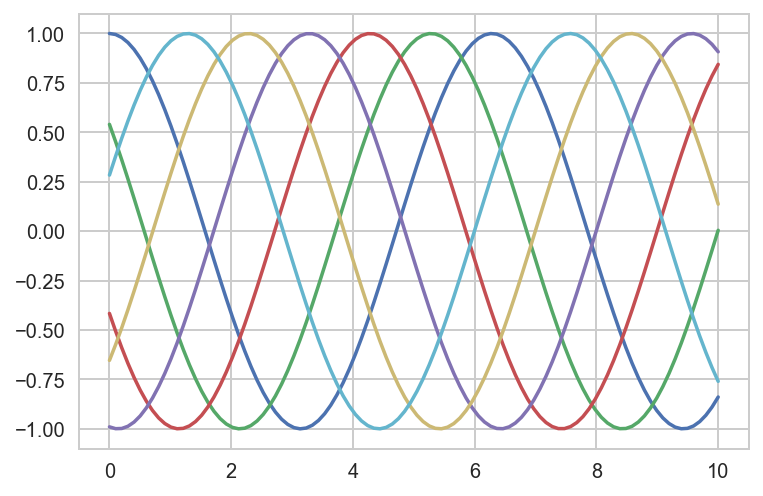

In [7]:
#set whitegrid style
sns.set_style('whitegrid')#gid는 모눈을 의미한다.whitegrid는? 뻔하지뭐..ㅎㅎ
cosplot()

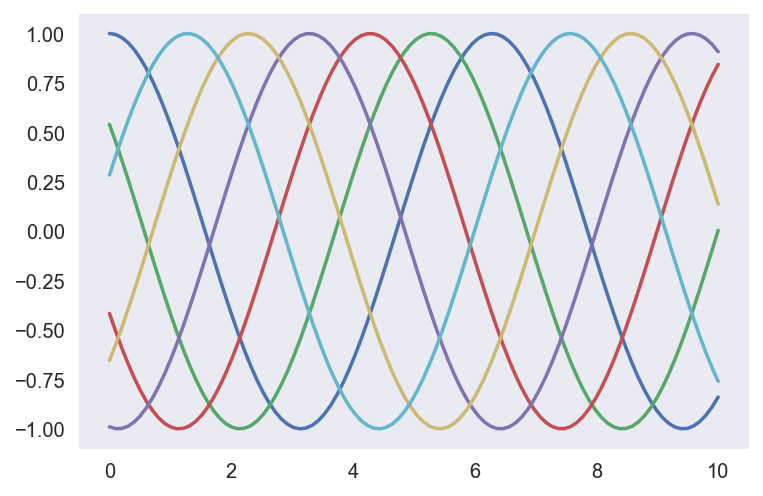

In [8]:
sns.set_style('dark')
cosplot()

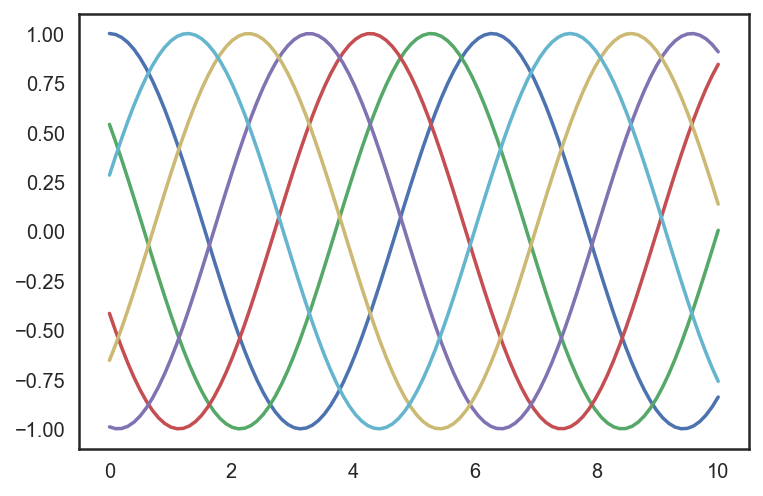

In [10]:
sns.set_style('white')
cosplot()

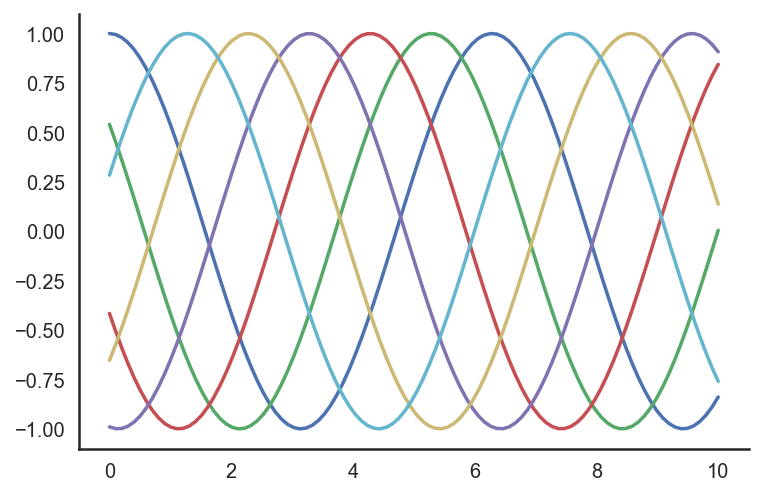

In [11]:
#remove axes spines
cosplot()
sns.despine()

### set context
- 그래프의 context를 설정
- 아래의 4개는 다른 version의 context라고 생각하면 된다.
    - paper
    - notebook
    - talk
    - poster
        - context들이 점점 두꺼워짐을 아래를 보면 알 수 있다.

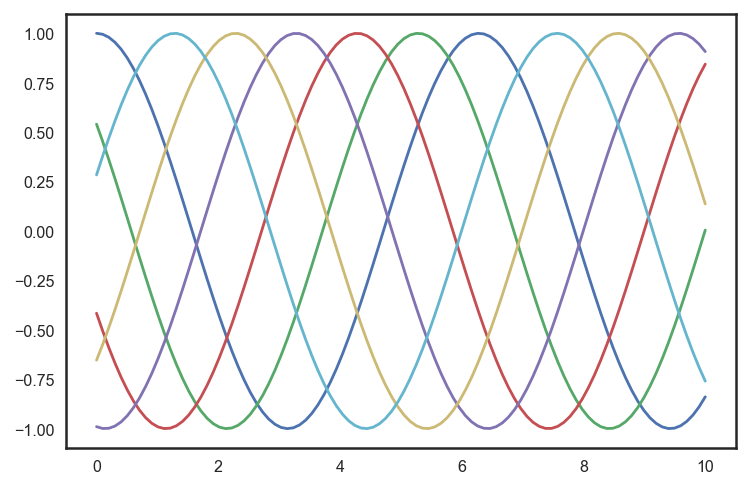

In [17]:
sns.set_context("paper")
cosplot()

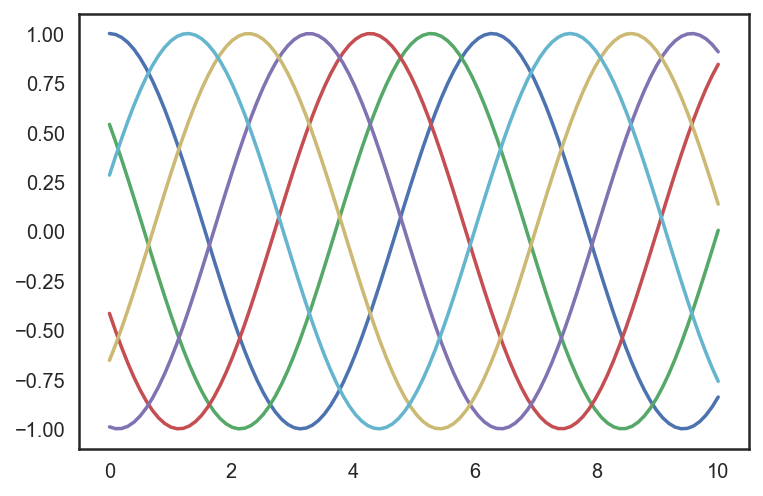

In [18]:
sns.set_context("notebook")
cosplot()

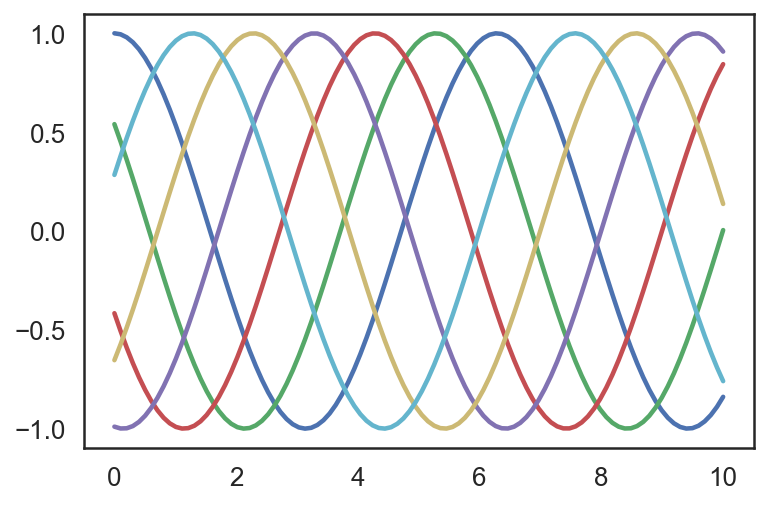

In [19]:
sns.set_context("talk")
cosplot()

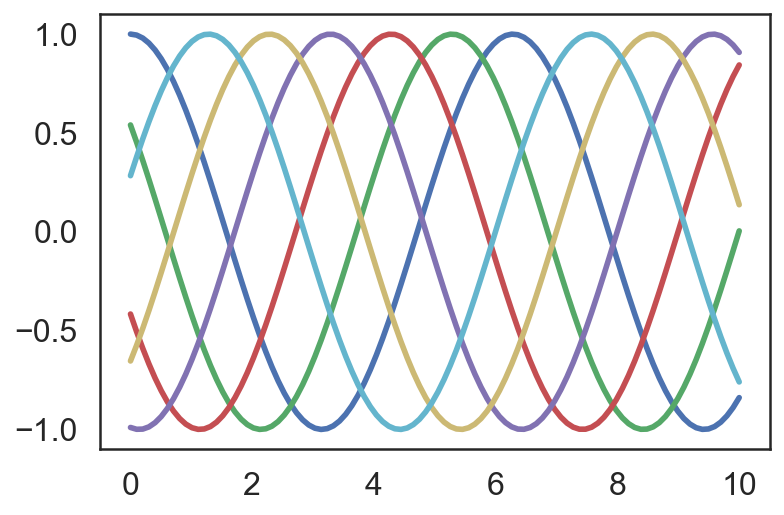

In [20]:
sns.set_context("poster")
cosplot()

### color palettes

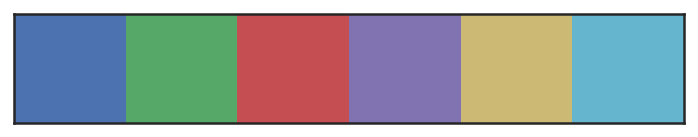

In [25]:
#check current palette
current_palette=sns.color_palette() # 현재 쓰고 있는 색상
sns.palplot(current_palette)#색상표(pallette)를 볼 수 있다.

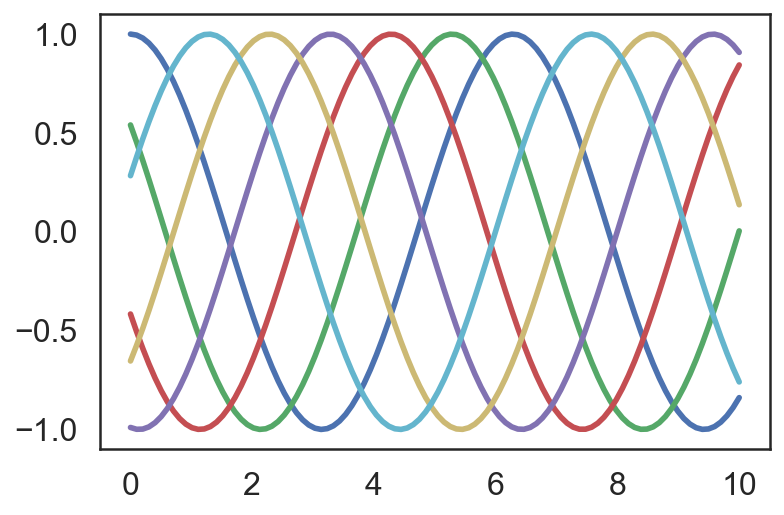

In [21]:
cosplot()
#아래의 cosplot 에 사용되는 색깔들의 모음(palette)를 위에서 확인할 수 있다!

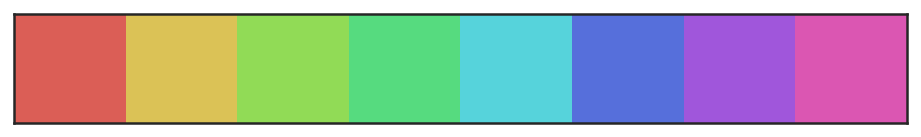

In [28]:
#change palette
palette=sns.color_palette('hls',8)
#Return a list of colors defining a color palette.
#(palette변수에 해당 palette색깔을 할당한다.)
sns.palplot(palette) 
#sequence of matplotlib colors(palette에 어떤 색이 있는지 배열형태로 본다.)
sns.set_palette('hls',8) 
#Set the matplotlib color cycle using a seaborn palette.(current_palette의 설정을 변경)

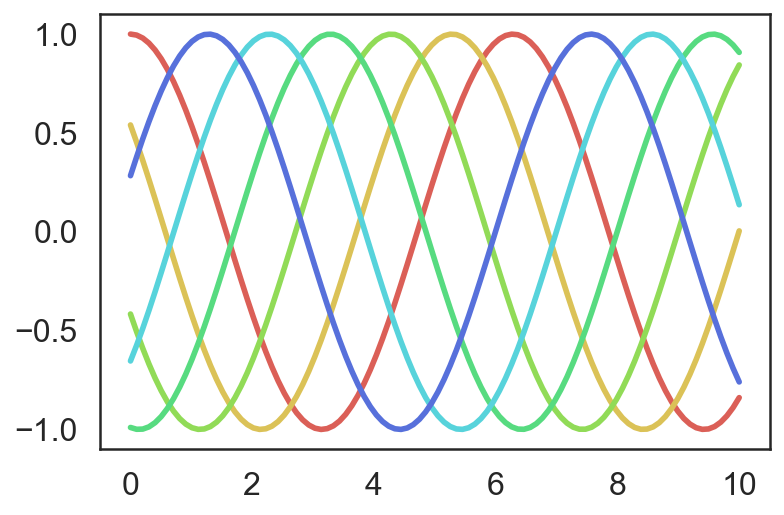

In [29]:
cosplot()

### Sample data

In [30]:
iris=sns.load_dataset('iris')
iris.tail()
#dataframe의 형태로 loading

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [31]:
sns.set_style('whitegrid')
sns.set_context('notebook')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### histogram

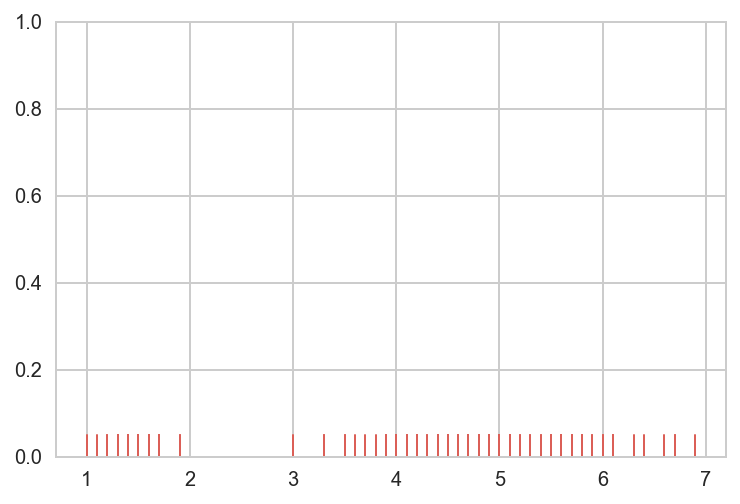

In [32]:
sns.rugplot(iris.petal_length.values)
#Plot datapoints in an array as sticks on an axis.
#쉽게 말하자면, 그냥 bar chart처럼 histogram의 형태를 띈다는 거다.

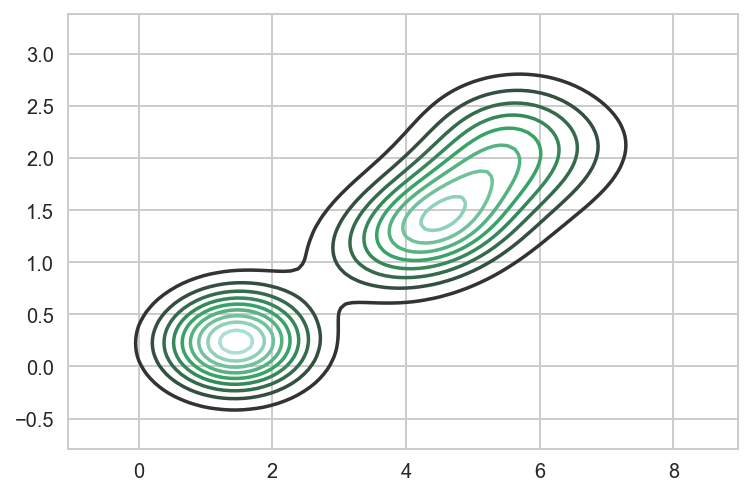

In [39]:
sns.kdeplot(iris.petal_length.values,iris.petal_width.values)
#Fit and plot a univariate or bivariate kernel density estimate.
#확률 분포와 같이 continuous probability function을 visualize한다.

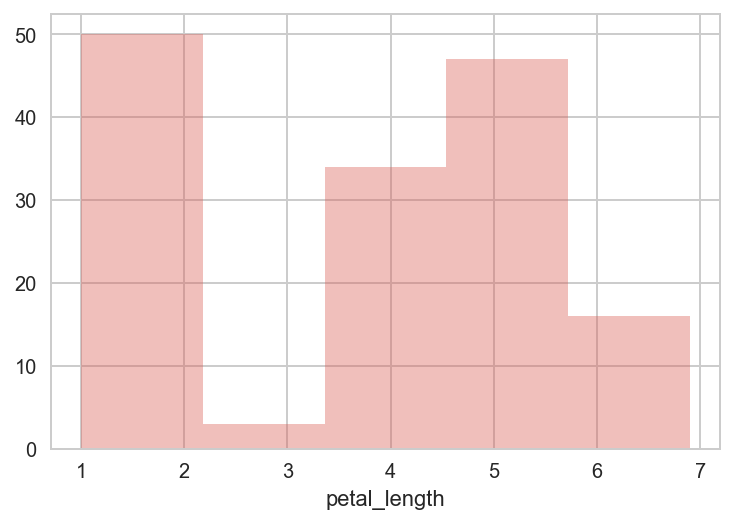

In [37]:
sns.distplot(iris.petal_length,kde=False)
#Flexibly plot a univariate distribution of observations.

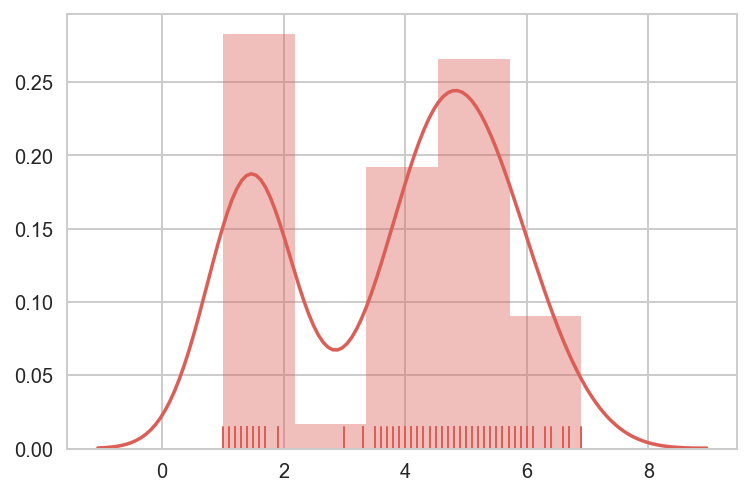

In [44]:
sns.distplot(iris.petal_length.values,rug=True,kde=True)

### 여기서 잠깐!!
#### univariate data와 bivariate data 의 차이를 짚고 넘어가자!!

### 1. univariate Data(Visualize by using distplot)
- single variable을 다룹니다.
- 원인이나 관계를 다루지 않습니다.
- 주된 목적은 descirbe(규칙을 제시해주는 것이 아니라, 현상을 기술하는 것)
- central tendency
- dispersion
- frequency
- bar, histogram, pie,line,etc
- Sample Question:
    - How many of the students in the freshman class are female?(variable:female)

### 2. Bivariate Data(Visualize by using kdeplot)
- two variables를 다룹니다.
- 원인이나 관계를 다룹니다.
- 분석의 주된 목적은 설명(explain)입니다.
- correlation
- comparison,relationship,causes,explanations
- analysis of two variables simultaneously
- table where one variable is contingent on the values of the other variables.
- independent and dependent variables
- Sample question:
    -  Is there a relationship between the number of females in Computer Programming and their scores in Mathematics?(variable: females in C/P, their score)

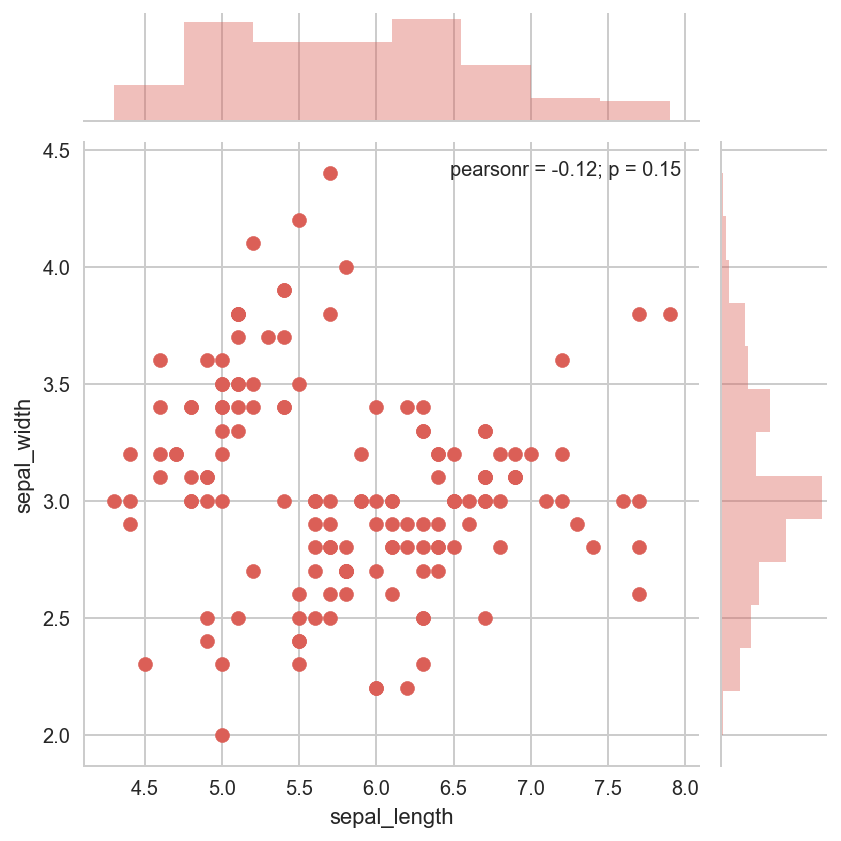

In [46]:
sns.jointplot(x="sepal_length",y="sepal_width",data=iris)
# Draw a plot of two variables with bivariate and univariate graphs.
# Classification에 쓰이는 plot으로 보이나, 아직까지 잘 모르겠다 솔직히...

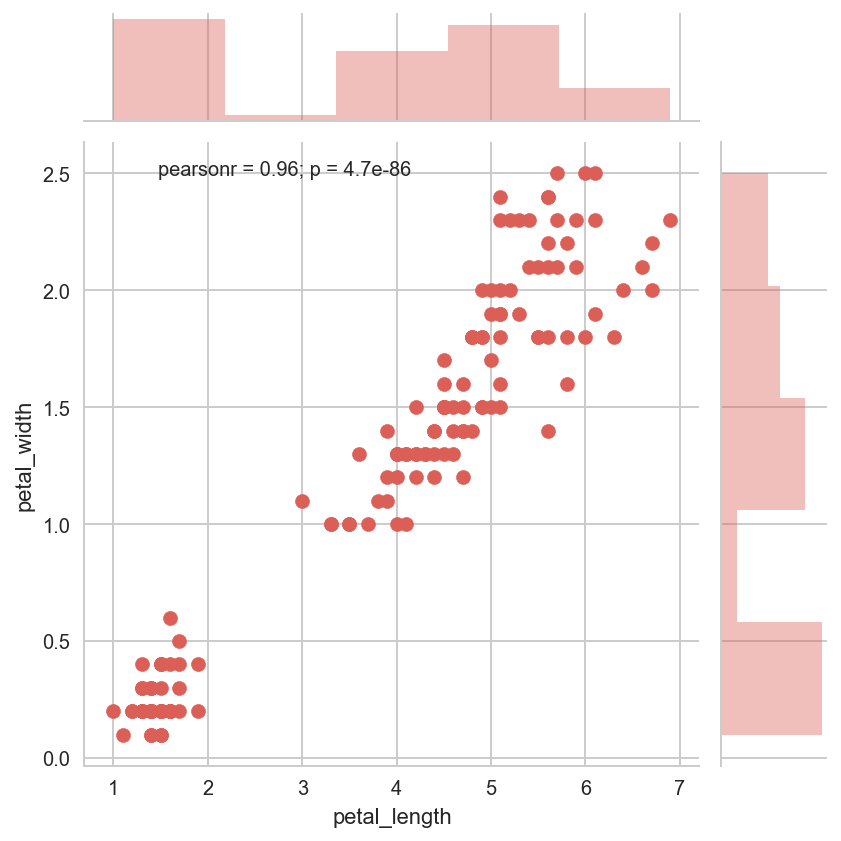

In [48]:
sns.jointplot(x='petal_length',y='petal_width',data=iris)
# 뭔가 Classification이 맞는 것 같다!!

### Pairplot

In [49]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


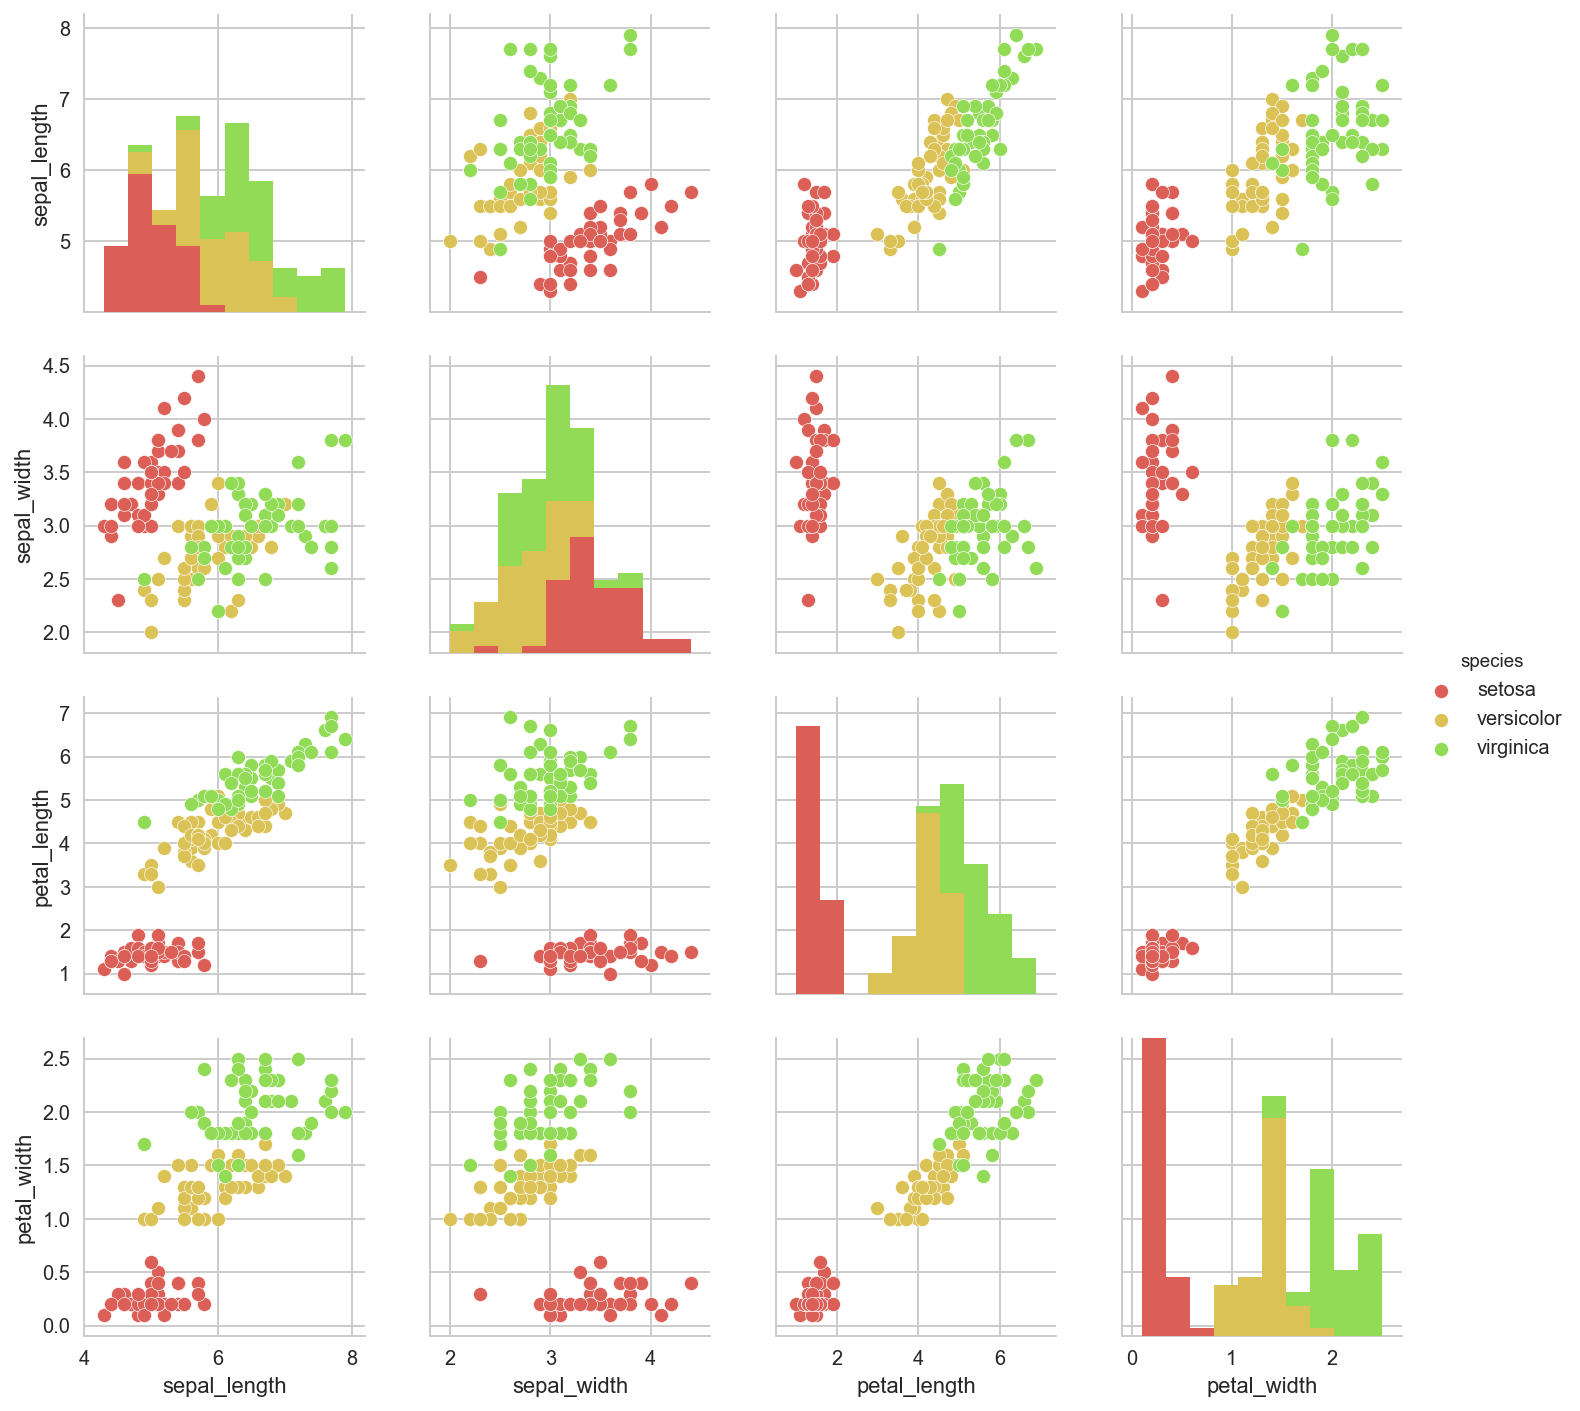

In [51]:
sns.pairplot(iris,hue='species')
plt.show()
#모든 component과의 correlation을 한꺼번에 subplot으로 visualization해주는 pairplot!!
#시간이 좀 걸린다..

### lmplot

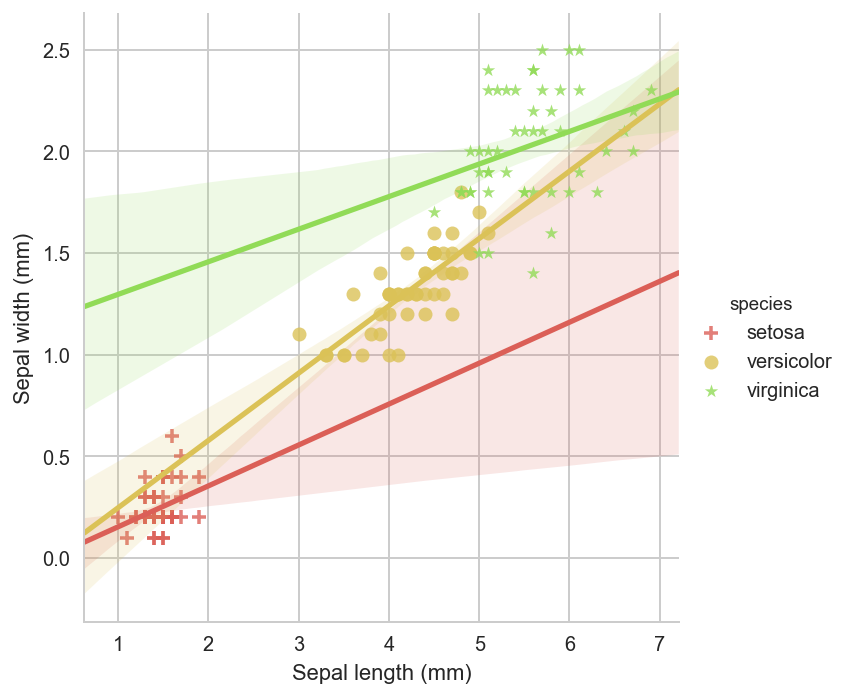

In [52]:
p=sns.lmplot(x='petal_length',y='petal_width',hue='species'\
             ,data=iris,markers=['+','o','*'])
p.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")
#이게 진짜 classification에서 쓰이는 modeling plot으로 보인다!!
# Plot data and regression model fits across a FacetGrid.

### heatmap

In [53]:
tips=sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [55]:
tips_sum=tips.pivot_table(index='time',columns='sex',values='tip',aggfunc=np.sum)
tips_sum

sex,Male,Female
time,,
Lunch,95.11,90.40
Dinner,389.96,156.11


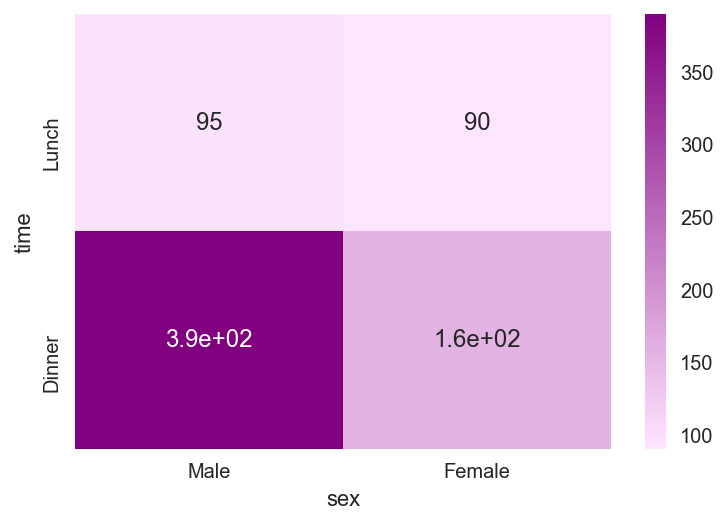

In [61]:
sns.heatmap(tips_sum, cmap=sns.light_palette("purple", as_cmap=True), annot=True)
#annot: 수치정보 입력, as_cmap:스무스하게 표현

In [62]:
flights = sns.load_dataset("flights")
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [63]:
flights_df = flights.pivot("month", "year", "passengers")
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


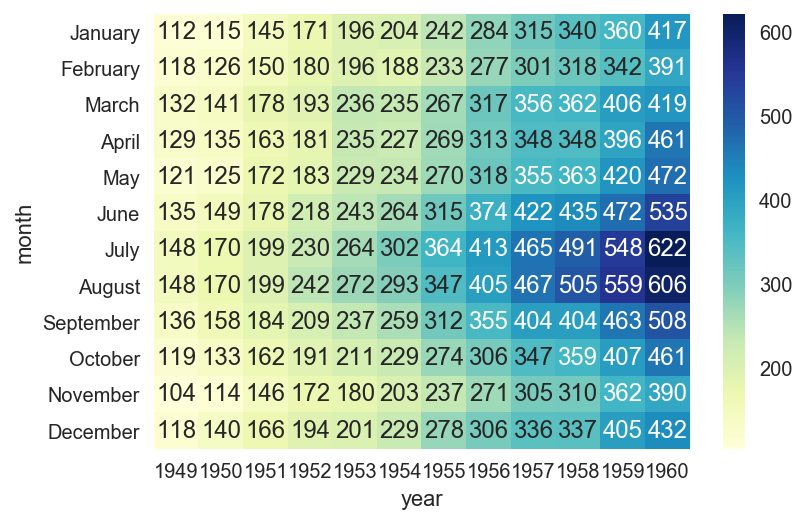

In [64]:
sns.heatmap(flights_df, cmap="YlGnBu", annot=True, fmt="d")

## Leaflet

- leaflet은 Javascipt 기반의 라이브러리이기 때문에 사전에 install해야 할 것들이 있다.
- mac
    - $ sudo pip3 install ipyleaflet
    - $ pip3 install ipywidgets

- windows
    - $ conda install -c conda-forge ipyleaflet
    - $ conda install -c anaconda ipywidgets
- common
    - $ jupyter nbextension install --py --symlink --sys-prefix ipyleaflet
    - $ jupyter nbextension enable --py --sys-prefix ipyleaflet
    - $ jupyter nbextension enable --py widgetsnbextension

In [74]:
from ipyleaflet import *
import time

### Basic

In [76]:
center = [37.470488, 126.906568]
zoom = 14
m = Map(center=center, zoom=zoom)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[37.470488, 126.906568], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=14)

### Add Marker

In [68]:
marker = Marker(location=center)
m += marker

In [70]:
df = pd.read_csv("cctv.csv")[:10]
df = df[["위도","경도"]]
df

,위도,경도
0,37.475977,126.906818
1,37.470488,126.906568
2,37.468207,126.890789
3,37.464440,126.900331
4,37.466631,126.908008
5,37.462335,126.907400
6,37.459921,126.907670
7,37.455431,126.904157
8,37.453722,126.912529
9,37.452033,126.913221


In [71]:
locs = list(zip(df["위도"],df["경도"]))
locs

[(37.4759766, 126.90681789999996),
 (37.470488, 126.906568),
 (37.468207299999996, 126.89078949999998),
 (37.46444, 126.9003315),
 (37.4666305, 126.90800779999996),
 (37.462334999999996, 126.90740000000004),
 (37.4599209, 126.90767019999998),
 (37.4554309, 126.90415710000002),
 (37.4537223, 126.91252889999998),
 (37.4520329, 126.91322130000003)]

In [78]:
for loc in locs:
    marker = Marker(location=loc)
    m += marker
    time.sleep(0.5)